In [1]:
import nltk
import re
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import word_tokenize

%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\tusha\\OneDrive\\Documents\\important\\amazon_reviews.csv")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4,Four Stars,1406073600,23-07-2014,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5,MOAR SPACE!!!,1382659200,25-10-2013,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4,nothing to really say....,1356220800,23-12-2012,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5,Great buy at this price!!! *** UPDATE,1384992000,21-11-2013,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5,best deal around,1373673600,13-07-2013,513,0,0


In [3]:
df.describe()

,overall,unixReviewTime,day_diff,helpful_yes,total_vote
count,4915.000000,4.915000e+03,4915.000000,4915.000000,4915.000000
mean,4.587589,1.379465e+09,437.367040,1.311089,1.521465
std,0.996845,1.581857e+07,209.439871,41.619161,44.123095
min,1.000000,1.339200e+09,1.000000,0.000000,0.000000
25%,5.000000,1.365898e+09,281.000000,0.000000,0.000000
50%,5.000000,1.381277e+09,431.000000,0.000000,0.000000
75%,5.000000,1.392163e+09,601.000000,0.000000,0.000000
max,5.000000,1.406074e+09,1064.000000,1952.000000,2020.000000


In [4]:
df=df[['reviewText','overall']]

In [5]:
df.columns=['reviewText','Rating']

In [6]:
df

,reviewText,Rating
0,No issues.,4
1,"Purchased this for my device, it worked as adv...",5
2,it works as expected. I should have sprung for...,4
3,This think has worked out great.Had a diff. br...,5
4,"Bought it with Retail Packaging, arrived legit...",5
...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,1
4911,Used this for extending the capabilities of my...,5
4912,Great card that is very fast and reliable. It ...,5
4913,Good amount of space for the stuff I want to d...,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  4914 non-null   object
 1   Rating      4915 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 76.9+ KB


In [8]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4914 entries, 0 to 4914
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  4914 non-null   object
 1   Rating      4914 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 115.2+ KB


In [9]:
# Remove the rows with Ratings =3, Because it is neutral sentiment

In [10]:
df['Sentiment']=np.where(df['Rating']>3,1,0)

C:\Users\tusha\AppData\Local\Temp\ipykernel_21180\3421256923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment']=np.where(df['Rating']>3,1,0)


In [11]:
df

,reviewText,Rating,Sentiment
0,No issues.,4,1
1,"Purchased this for my device, it worked as adv...",5,1
2,it works as expected. I should have sprung for...,4,1
3,This think has worked out great.Had a diff. br...,5,1
4,"Bought it with Retail Packaging, arrived legit...",5,1
...,...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,1,0
4911,Used this for extending the capabilities of my...,5,1
4912,Great card that is very fast and reliable. It ...,5,1
4913,Good amount of space for the stuff I want to d...,5,1


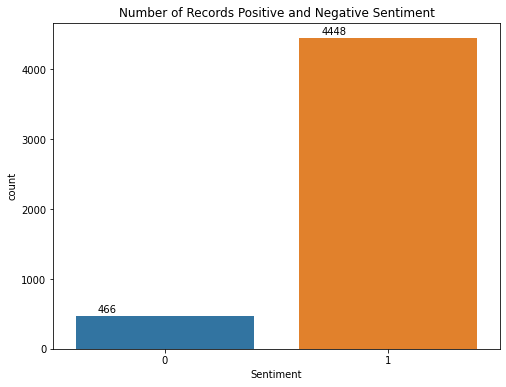

In [12]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(8,6))
plt.title("Number of Records Positive and Negative Sentiment")
plot=sns.countplot(x='Sentiment',data=df)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+0.10 ,p.get_height()+50))

In [13]:
# Data cleaning and Text Pre-processing

In [15]:
from textblob import Word, TextBlob

df['reviewText'] = df['reviewText'].str.lower()
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '')
df['reviewText'] = df['reviewText'].str.replace('\d', '')
sw = stopwords.words('english')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()
drops = temp_df[temp_df <= 1]
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
df["reviewText"].apply(lambda x: TextBlob(x).words).head()
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


C:\Users\tusha\AppData\Local\Temp\ipykernel_21180\788110900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df['reviewText'].str.lower()
C:\Users\tusha\AppData\Local\Temp\ipykernel_21180\788110900.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '')
C:\Users\tusha\AppData\Local\Temp\ipykernel_21180\788110900.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'

In [17]:
df.head()

,reviewText,Rating,Sentiment
0,issue,4,1
1,purchased device worked advertised never much ...,5,1
2,work expected higher capacity think made bit e...,4,1
3,think worked gb card went south one held prett...,5,1
4,bought retail packaging arrived legit envelope...,5,1


In [18]:
#tf-Term frequencies

tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf.head()

,words,tf
0,issue,609.0
1,purchased,344.0
2,device,584.0
3,worked,460.0
4,advertised,111.0


In [19]:
#Text Visualization

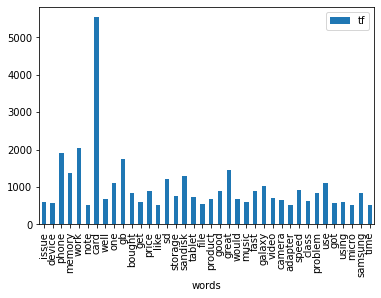

In [20]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

In [21]:
#WordCloud

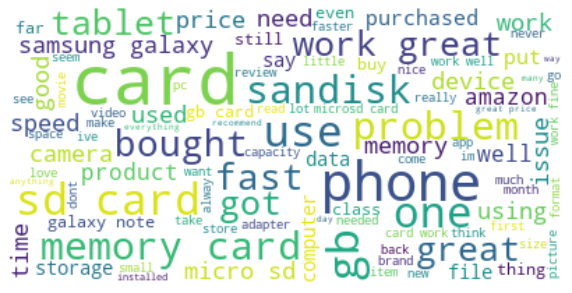

In [23]:
from wordcloud import WordCloud


text = " ".join(i for i in df.reviewText)
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:
# Creating Features
# 1.Bag of word model

In [30]:
cv=CountVectorizer(min_df=5,ngram_range=(1,2))

In [39]:
x_1=cv.fit_transform(df['reviewText'])

In [40]:
# 2. Tfidf model - Term frequency and inverse document frequency model

In [41]:
tfidf=TfidfVectorizer(min_df=5, max_df=0.95, ngram_range = ( 1, 2 ),sublinear_tf = True)

In [42]:
tfidf=tfidf.fit(df['reviewText'])

In [43]:
x_2=tfidf.transform(df['reviewText'])

In [78]:
X=x_1                        # x_2 for Tfidf model
y=df['Sentiment'].values


In [79]:

#  Machine Learning


In [80]:

# Splitting dataset into Training and Test set


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [81]:
# Logistic regression

In [82]:
from sklearn.linear_model import LogisticRegression

model_lr=LogisticRegression(penalty='l2',C=1.0,random_state=0)
model_lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [83]:
y_pred=model_lr.predict(x_test)

In [84]:
print('accuracy for Logistic Regression :',accuracy_score(y_test,y_pred))

accuracy for Logistic Regression : 0.9338758901322483


In [85]:
print('confusion matrix for Logistic Regression:\n',confusion_matrix(y_test,y_pred))

confusion matrix for Logistic Regression:
 [[ 47  49]
 [ 16 871]]


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.49      0.59        96
           1       0.95      0.98      0.96       887

    accuracy                           0.93       983
   macro avg       0.85      0.74      0.78       983
weighted avg       0.93      0.93      0.93       983



In [87]:
# In logistic regression we observed that model accuracy is very high 93%. Look at the confusion matrix in 1st row 
# we say that 47 observation is correctly classified as negative sentiment and 2nd row 871 observation are correctly classified 
# as positive sentiments.

In [88]:
# Naive_Bayes Classifier

In [89]:
from sklearn.naive_bayes import MultinomialNB

model_nb=MultinomialNB()
model_nb.fit(x_train,y_train)

MultinomialNB()

In [90]:
y_pred1=model_nb.predict(x_test)

In [91]:
print("accuracy of model : ",accuracy_score(y_test,y_pred1))

accuracy of model :  0.9237029501525941


In [92]:
print("confusion matrix :\n",confusion_matrix(y_test,y_pred1))

confusion matrix :
 [[ 76  20]
 [ 55 832]]


In [93]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.58      0.79      0.67        96
           1       0.98      0.94      0.96       887

    accuracy                           0.92       983
   macro avg       0.78      0.86      0.81       983
weighted avg       0.94      0.92      0.93       983



In [94]:
# In Naive_bayes classifier we observed that model accuracy is very high 92%. Look at the confusion matrix in 1st row 
# we say that 76 observation is correctly classified as negative sentiment and 2nd row 832 observation are correctly classified 
# as positive sentiments.

In [95]:
# Random Forest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)
y_pred2=model_rf.predict(x_test)

In [97]:
print("accuracy of mode :", accuracy_score(y_test,y_pred2))

accuracy of mode : 0.91353001017294


In [98]:
print("confusion matrix :\n", confusion_matrix(y_test,y_pred2))

confusion matrix :
 [[ 19  77]
 [  8 879]]


In [99]:
print("classification report :\n", classification_report(y_test,y_pred2))

classification report :
               precision    recall  f1-score   support

           0       0.70      0.20      0.31        96
           1       0.92      0.99      0.95       887

    accuracy                           0.91       983
   macro avg       0.81      0.59      0.63       983
weighted avg       0.90      0.91      0.89       983



In [101]:
# Random forest classifier model has very high accuracy that is 91%
# From confusion matrix , in 1st row 19 observation are correctly classified as negative sentiment, and in 2nd row 879 observations
#  are correctly classified as positive sentiments.

In [102]:
# Support Vector Machine

In [104]:
from sklearn.svm import SVC

model_svm=SVC()
model_svm.fit(x_train,y_train)

SVC()

In [105]:
y_pred3=model_svm.predict(x_test)

In [106]:
print("accuracy of the model :", accuracy_score(y_test,y_pred3))

accuracy of the model : 0.9104781281790437


In [107]:
print("confusion matrix :\n" , confusion_matrix(y_test,y_pred3))

confusion matrix :
 [[  8  88]
 [  0 887]]


In [108]:
print("classification report :\n", classification_report(y_test,y_pred3))

classification report :
               precision    recall  f1-score   support

           0       1.00      0.08      0.15        96
           1       0.91      1.00      0.95       887

    accuracy                           0.91       983
   macro avg       0.95      0.54      0.55       983
weighted avg       0.92      0.91      0.87       983



In [116]:
# Here the support vector machine has very high accuracy 91%.

In [117]:
# KNN Classifier

In [119]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=14)
model_knn.fit(x_train,y_train)
y_pred4=model_knn.predict(x_test)

C:\Users\tusha\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [120]:
print("accuracy of model :", accuracy_score(y_test,y_pred4))

accuracy of model : 0.9053916581892166


In [121]:
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred4))

confusion_matrix:
 [[  7  89]
 [  4 883]]


In [122]:
print("classification_report:\n", classification_report(y_test,y_pred4))

classification_report:
               precision    recall  f1-score   support

           0       0.64      0.07      0.13        96
           1       0.91      1.00      0.95       887

    accuracy                           0.91       983
   macro avg       0.77      0.53      0.54       983
weighted avg       0.88      0.91      0.87       983

